<a href="https://colab.research.google.com/github/deep-l3arn3r/tutorials/blob/main/torch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.manual_seed(3)

 ***Q1 Creating the Dataset***

In [35]:
X = torch.arange(0,100).unsqueeze(dim=1).type(torch.float32)
X[:5], X.shape

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.]]),
 torch.Size([100, 1]))

In [36]:
weight = 0.3
bias = 0.9

y = weight*X + bias
y[:5], y.shape

(tensor([[0.9000],
         [1.2000],
         [1.5000],
         [1.8000],
         [2.1000]]),
 torch.Size([100, 1]))

In [37]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

X_train.shape, X_test.shape

(torch.Size([80, 1]), torch.Size([20, 1]))

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

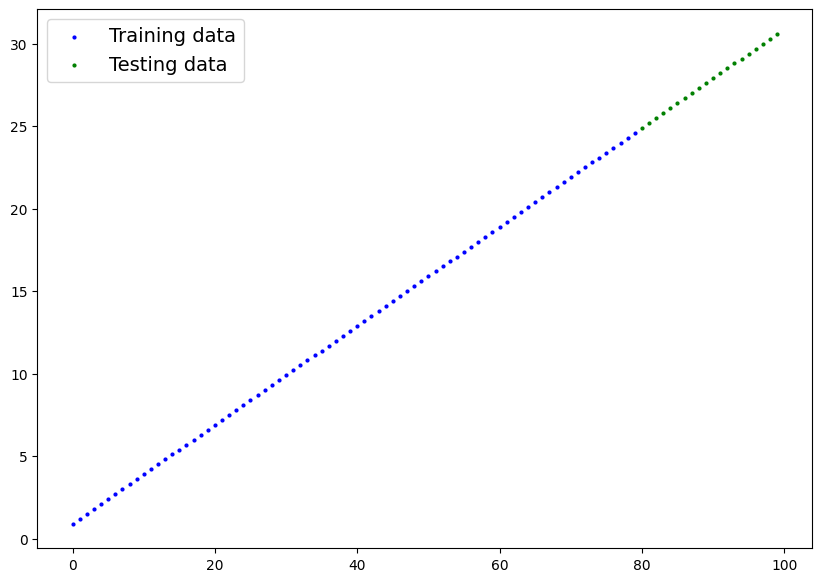

In [39]:
plot_predictions()

***Q2 Creating the Model***

In [40]:
torch.manual_seed(3)

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, X):
    return self.linear(X)

In [41]:
model = LinearRegression()
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.9915]])),
             ('linear.bias', tensor([-0.7889]))])

In [42]:
model.state_dict()['linear.weight'].dtype

torch.float32

***Q3 Loss function***

In [43]:
LR = 0.0001
params = model.parameters()

loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params, LR)

train_losses, test_losses = [], []

for epoch in range(300):
  model.train()

  y_pred_train = model(X_train)
  y_pred_train = y_pred_train.type(torch.float64)

  loss = loss_fn(y_pred_train, y_train)
  train_losses.append(loss.item())

  if epoch%20==0:
    print('At epoch {}, Train loss {}'.format(epoch, loss.item()))

  optim.zero_grad()

  loss.backward()
  optim.step()

  with torch.inference_mode():
    y_pred_test = model(X_test)

    test_loss = loss_fn(y_pred_test, y_test)
    test_losses.append(test_loss.item())

    if epoch%20==0:
      print('At epoch {}, Test loss {}'.format(epoch, test_loss.item()))



At epoch 0, Train loss 52.70204345136881
At epoch 0, Test loss 116.92207336425781
At epoch 20, Train loss 49.5795432344079
At epoch 20, Test loss 109.84956359863281
At epoch 40, Train loss 46.45704306513071
At epoch 40, Test loss 102.77705383300781
At epoch 60, Train loss 43.33454252034426
At epoch 60, Test loss 95.70457458496094
At epoch 80, Train loss 40.212043066322806
At epoch 80, Test loss 88.63206481933594
At epoch 100, Train loss 37.0895422026515
At epoch 100, Test loss 81.55956268310547
At epoch 120, Train loss 33.96704237908125
At epoch 120, Test loss 74.48706817626953
At epoch 140, Train loss 30.84454213529825
At epoch 140, Test loss 67.4145736694336
At epoch 160, Train loss 27.72204194813967
At epoch 160, Test loss 60.342063903808594
At epoch 180, Train loss 24.59954195767641
At epoch 180, Test loss 53.269569396972656
At epoch 200, Train loss 21.477041609585285
At epoch 200, Test loss 46.19706726074219
At epoch 220, Train loss 18.354541389644147
At epoch 220, Test loss 39.12

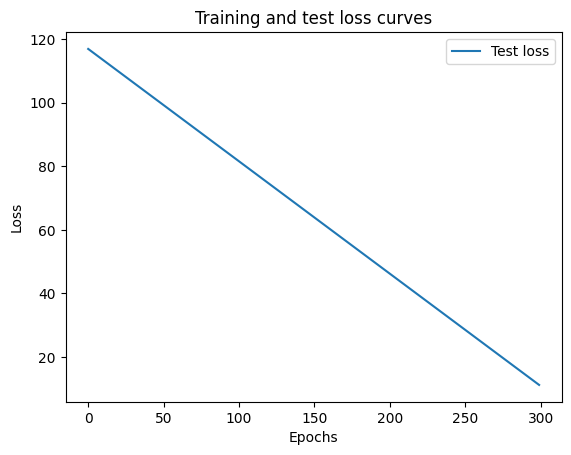

In [44]:
# plt.plot(list(range(0,300)), train_losses, label="Train loss")
plt.plot(list(range(0,300)), test_losses, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

***Q5 saving and loading***

In [45]:
torch.save(obj=model.state_dict(), f='model.pth')

In [46]:
loaded_model_0 = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f='model.pth'))

<All keys matched successfully>

In [47]:
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [48]:
loaded_model_preds == y_pred_test

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [27]:
loaded_model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.3207]])),
             ('linear.bias', tensor([-0.4837]))])